In [2]:
import uproot
import awkward as ak

import matplotlib.pylab as plt
import numpy as np

import time


In [3]:
import mplhep as hep

In [4]:
#hep.style.use(hep.style.CMS)

In [5]:
time.time()

1714405582.3520703

scp -i ~/.ssh/babar_ltda -P2200 bellis@babar-transfer.babar.uvic.ca:ana54/workdir/btaoutput_bnv.root .


In [6]:
start = time.time()

x = np.random.random(100000000)

end = time.time()
print(f"Time to run = {end - start} seconds")

Time to run = 0.5197768211364746 seconds


In [7]:
#f = uproot.open('btaoutput_bnv.root')
f = uproot.open('bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03/bnv_analysis/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03-1.root')

f

<ReadOnlyDirectory '/' at 0x7f82987d5c90>

In [8]:
f.keys()

['ntp1;1']

In [9]:
t = f['ntp1']

keys = t.keys()

max_len = 80
output = ""
for k in keys:
    if len(output)<max_len:
        output = f"{output}{k:20s} "
    else:
        print(output)
        output = f"{k:20s} "

runNumber            platform             partition            upperID              
lowerID              majorID              configKey            date                 
ddate                eePx                 eePy                 eePz                 
eeE                  beamSX               beamSY               beamSZ               
beamSCovXX           beamSCovYY           beamSCovZZ           beamSCovXZ           
nTracks              nGoodTrkLoose        nChargedTracks       R2                   
R2All                thrustMag            thrustMagAll         thrustCosTh          
thrustCosThAll       thrustPhi            thrustPhiAll         sphericityAll        
mcLen                mcLund               mothIdx              dauLen               
dauIdx               mcmass               mcp3CM               mccosthCM            
mcphiCM              mcenergyCM           mcp3                 mccosth              
mcphi                mcenergy             mcVtxx               mc

In [10]:
#x = data['BR2ROE'][:,0]
#plt.hist(x)

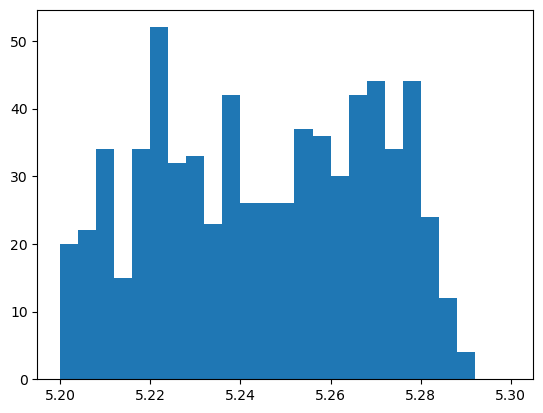

In [11]:
#x = t['B_con_preFitMass'].array()
x = t['BpostFitMes'].array()
#x = t['BpostFitDeltaE'].array()

#x = t['Lambda0Lund'].array()
#x = t['BpostFitFlight'].array()

x = ak.flatten(x)

plt.hist(x, bins=25, range=(5.20,5.3));
#plt.hist(x, bins=25, range=(-0.25,0.25));

In [12]:
x = t['np'].array()
#x
len(x)

1054

In [13]:
len(x)

1054

2101


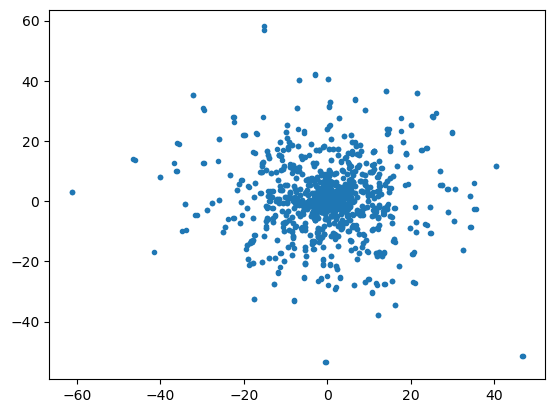

In [14]:
x = t['Lambda0Vtxx'].array()
x = ak.flatten(x)

y = t['Lambda0Vtxy'].array()
y = ak.flatten(y)

plt.plot(x,y,'.');

print(len(x))


In [15]:
x

<Array [0.738, 0.728, 0.106, ..., -2.76, 4.46, 4.46] type='2101 * float32'>

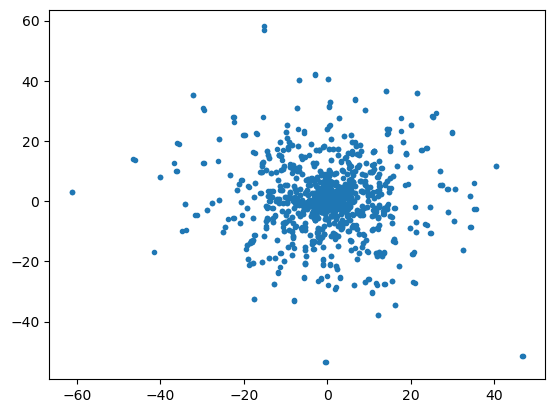

In [16]:
x = t['Lambda0Vtxx'].array()
x = ak.flatten(x)

y = t['Lambda0Vtxy'].array()
y = ak.flatten(y)

plt.plot(x,y,'.');


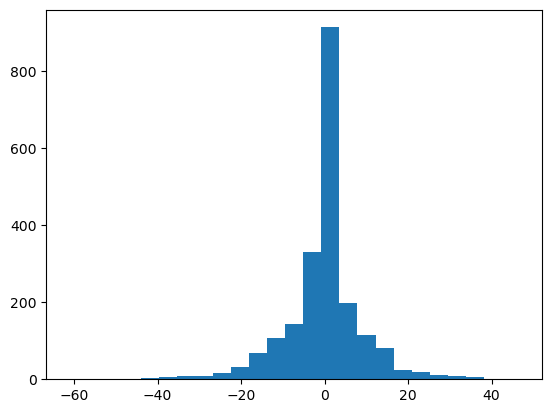

In [17]:
#x = t['nB'].array()
#x = t['nLambda0'].array()
#x = t['np'].array()
#x = t['npi'].array()
#x = t['nTRK'].array()


plt.hist(x, bins=25);

In [18]:
x = t['beamSX'].array()
print(x)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [19]:
Bx = t['BVtxx'].array()
By = t['BVtxy'].array()
Bz = t['BVtxz'].array()

Bx

<Array [[0.0738, 0.0738], ..., [0.129, 0.129]] type='1054 * var * float32'>

In [20]:
Lx = t['Lambda0Vtxx'].array()
Ly = t['Lambda0Vtxy'].array()
Lz = t['Lambda0Vtxz'].array()

1054


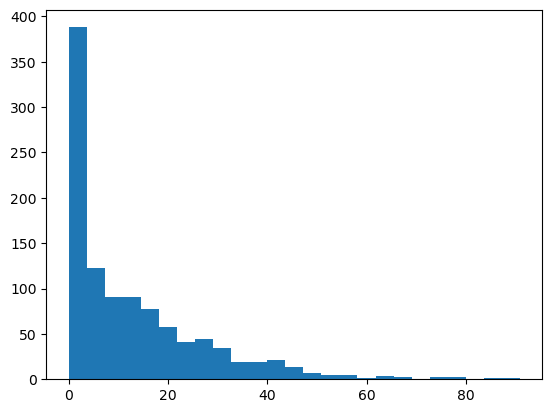

In [21]:
dx = Lx-Bx
dy = Ly-By
dz = Lz-Bz

dist = np.sqrt(dx**2 + dy**2 + dz**2)
a = dist[:,0]
print(len(a))

plt.hist(a,bins=25);

In [22]:

start = time.time()

spmodes = ["998", "1005", "1235", "1237", "3429", "3981"]

filenames = []

for sp in spmodes:
    #filenames.append(f'bnv_plambda/SP-{sp}-LambdaVeryVeryLoose-Run*-R24a2-v03/bnv_analysis/*v03-*.root:ntp1')
    filenames.append(f'bnv_plambda/SP-{sp}-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root:ntp1')


data = {}
i = 0
for sp,filename in zip(spmodes,filenames):
    print(sp,filename)
    #array = uproot.concatenate("bnv_plambda/SP-998-LambdaVeryVeryLoose-Run*-R24a2-v03/bnv_analysis/SP-998-LambdaVeryVeryLoose-Run*-R24a2-v03-*.root:ntp1", \
    data[sp] = uproot.concatenate(filename, \
                           ["BpostFitMes", "BpostFitDeltaE", 'Lambda0Mass', 'Lambda0_unc_Mass'], \
                             allow_missing=True)

    #array

print(f"Took {time.time() - start} s")

998 bnv_plambda/SP-998-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root:ntp1
1005 bnv_plambda/SP-1005-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root:ntp1
1235 bnv_plambda/SP-1235-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root:ntp1
1237 bnv_plambda/SP-1237-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root:ntp1
3429 bnv_plambda/SP-3429-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root:ntp1
3981 bnv_plambda/SP-3981-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root:ntp1
Took 6.090479850769043 s


In [23]:
a = ak.Array({"x":[[10, 20], [30]]})
b = ak.Array({"x":[[5,6,7]]})

#ak.concatenate
c = ak.concatenate([a,b])
c.x

<Array [[10, 20], [30], [5, 6, 7]] type='3 * var * int64'>

In [24]:
!ls bnv_plambda/SP-998-LambdaVeryVeryLoose-Run*-R24a2-v03_COMBINED.root

bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
bnv_plambda/SP-998-LambdaVeryVeryLoose-Run2-R24a2-v03_COMBINED.root
bnv_plambda/SP-998-LambdaVeryVeryLoose-Run3-R24a2-v03_COMBINED.root
bnv_plambda/SP-998-LambdaVeryVeryLoose-Run4-R24a2-v03_COMBINED.root
bnv_plambda/SP-998-LambdaVeryVeryLoose-Run5-R24a2-v03_COMBINED.root
bnv_plambda/SP-998-LambdaVeryVeryLoose-Run6-R24a2-v03_COMBINED.root


In [25]:
list(f.keys())

['ntp1;1']

# Merge all the files

Or some of the files

In [27]:
#'''
start = time.time()

spmodes = ["998", "1005", "1235", "1237", "3429", "3981"]
#spmodes = ["3429"]
#spmodes = ['998']
#runs = [1,2,3,4,5,6]
runs = [1]
#runs = [1,2]

def get_spmode_from_filename(filename):
    sp = filename.split('SP-')[1].split('-')[0]
    return sp

def get_run_from_filename(filename):
    run = filename.split('Run')[1].split('-')[0]
    return run


filenames = []

for sp in spmodes:
    for run in runs:
        #filenames.append(f'bnv_plambda/SP-{sp}-LambdaVeryVeryLoose-Run*-R24a2-v03/bnv_analysis/*v03-*.root:ntp1')
        filenames.append(f'bnv_plambda/SP-{sp}-LambdaVeryVeryLoose-Run{run}-R24a2-v03_COMBINED.root')


first_time = 1
datadict = {}
for filename in filenames:
    sp = get_spmode_from_filename(filename)
    run = get_run_from_filename(filename)
    f = uproot.open(filename)
    if 'ntp1;1' not in list(f.keys()):
        continue
    t = f['ntp1']
    nentries = len(t['nB'].array())
    print(f"{sp:5s} {run:2s} {nentries:8d} {filename}")

    for key,value in t.items():
        if first_time:
            datadict[key] = value.array()

        else:
            datadict[key] = ak.concatenate([datadict[key], value.array()])

    # Add in values that are specific to the sp/run/mcordata
    if first_time:
        x = (int(sp)*np.ones(nentries,dtype=int)).astype(str)
        datadict['spmode'] = x
        x = np.ones(nentries,dtype=int)
        datadict['isMC'] = x
        x = int(run)*np.ones(nentries,dtype=int)
        datadict['run'] = x

    else:
        x = (int(sp)*np.ones(nentries,dtype=int)).astype(str)
        datadict['spmode'] = ak.concatenate([datadict['spmode'], x])
        x = np.ones(nentries,dtype=int) 
        datadict['isMC'] = ak.concatenate([datadict['isMC'], x])
        x = int(run)*np.ones(nentries,dtype=int)
        datadict['run'] = ak.concatenate([datadict['run'], x])

    
    first_time = 0
    print(f"Took {time.time() - start} s\n")


print(f"Took {time.time() - start} s")

#print(datadict)

alldata = ak.Array(datadict)

print(f"Took {time.time() - start} s")


#alldata

ak.to_parquet(alldata, 'Background_SP_Run1_only.parquet')
#''';

998   1     25647 bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Took 4.203325510025024 s

1005  1     15863 bnv_plambda/SP-1005-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Took 7.2982470989227295 s

1235  1       251 bnv_plambda/SP-1235-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Took 8.345433950424194 s

1237  1       132 bnv_plambda/SP-1237-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Took 9.323857307434082 s

3981  1        20 bnv_plambda/SP-3981-LambdaVeryVeryLoose-Run1-R24a2-v03_COMBINED.root
Took 9.582657814025879 s

Took 9.582750082015991 s
Took 9.584494352340698 s


  created_by: parquet-cpp-arrow version 12.0.1
  num_columns: 235
  num_rows: 41913
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [ ]:
start = time.time()

data = ak.from_parquet('test.parquet')

print(f"Took {time.time() - start} s")


In [ ]:
#mask = data['run'] == 6
mask = data['spmode'] == '998'
mask = mask & (data['Lambda0FlightLen'][:,0] > 1)

x = data[mask]['BpostFitMes'][:,0]
#plt.hist(x,bins=100,range=(5,5.3));

y = data[mask]['BpostFitDeltaE'][:,0]
#plt.hist(y,bins=100,range=(-0.3, 0.3));

plt.plot(x,y,'.',markersize=1)
plt.xlim(5.2,5.3)
plt.ylim(-0.3,0.3)


#x = data[mask]['sphericityAll']
#plt.hist(x,bins=100, range=(0,1));

In [ ]:
#mask = data.spmode == '1235'
mask = data.run == 1

x = ak.flatten(data[mask].BMass)

plt.hist(x, bins=100,range=(5,6));


In [ ]:
#x = ak.flatten(data['998']['BpostFitMes'])

#plt.hist(x,bins=100,range=(5,5.3));

In [ ]:
#x = ak.flatten(array['Lambda0Mass'])
#x = ak.flatten(data['998']['Lambda0_unc_Mass'])

#plt.hist(x,bins=100,range=(1.1,1.125));

;

In [ ]:
array = uproot.concatenate("bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03/bnv_analysis/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03-*.root:ntp1", \
                           ["Lambda0FlightLen", 'Lambda0_unc_Mass'])



In [ ]:
x = ak.flatten(array['Lambda0FlightLen'])

plt.hist(x,bins=100,range=(0,100));

;

In [ ]:
mask = array['Lambda0FlightLen'][:,0] > 1.0

x0 = array['Lambda0FlightLen'][:,0]
y0 = array['Lambda0_unc_Mass'][:,0]

x1 = x0[mask]
y1 = y0[mask]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(x0,bins=500,range=(-50,100));
plt.hist(x1,bins=500,range=(-50,100));
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(y0,bins=100,range=(1.1,1.13));
plt.hist(y1,bins=100,range=(1.1,1.13));

print(f"{len(x0)} {len(x1)} {len(x1)/len(x0):.2f}")

;

In [ ]:
plt.hist(x0)

In [ ]:
#f = uproot.open('btaoutput_bnv.root')
f = uproot.open('bnv_plambda/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03/bnv_analysis/SP-998-LambdaVeryVeryLoose-Run1-R24a2-v03-1.root')

f

t = f['ntp1']

type(t)

In [ ]:
t.items()

In [ ]:
datadict = {}
for key,value in t.items():
    datadict[key] = value.array()
datadict['spmode'] = (998*np.ones(len(t['nB'].array()),dtype=int)).astype(str)
#datadict['spmode']
datadict['isMC'] = np.ones(len(t['nB'].array()),dtype=int)
#datadict['spmode']


alldata = ak.Array(datadict)

alldata

In [ ]:
alldata.isMC

In [ ]:
alldata.sphericityAll

In [ ]:
plt.hist(alldata['sphericityAll'], bins=100);

In [ ]:
print(t['Lambda0d1Lund'].array())

In [ ]:
print(t['Lambda0d2Lund'].array())

In [ ]:
idx1 = t['Lambda0d1Idx'].array()
idx2 = t['Lambda0d2Idx'].array()

print('idx0, idx1')
print(idx1)
print(idx2)
print()

print(t['TRKenergy'].array()[idx1])
print(t['TRKenergy'].array()[idx2])

plt.hist(t['nLambda0'].array())

In [ ]:
idx1 = t['Bd1Idx'].array()
idx2 = t['Bd2Idx'].array()

print('idx1, idx2')
print(idx1)
print(idx2)
print()
print(t['Lambda0energy'].array()[idx1])
print(t['penergy'].array()[idx2])
print()

ld1 = t['Bd1Lund'].array()
ld2 = t['Bd2Lund'].array()

print('ld1, ld2')
print(ld1)
print(ld2)
print()



In [ ]:
n = 5

print(t['Benergy'].array()[n])
print()

idx1 = t['Bd1Idx'].array()[n]
idx2 = t['Bd2Idx'].array()[n]

print(idx1)
print(idx2)
print()


print(t['Lambda0energy'].array()[n])
print()

idx1 = t['Lambda0d1Idx'].array()[n]
idx2 = t['Lambda0d2Idx'].array()[n]
ld1 = t['Lambda0d1Lund'].array()[n]
ld2 = t['Lambda0d2Lund'].array()[n]

print(idx1)
print(ld1)
print(idx2)
print(ld2)




In [ ]:
print(t['Lambda0FlightLen'].array())
print(t['Lambda0FlightErr'].array())

print()

print(t['Lambda0FlightBSLen'].array())
print(t['Lambda0FlightBSErr'].array())


In [ ]:
t['Lambda0_unc_Mass'].array()

In [ ]:
#t['Lambda0FlightLen'].array()[:,0]

t['Lambda0FlightLen'].array()[-5:]

In [ ]:
import hist
from hist import Hist

In [ ]:
h = Hist.new.Reg(100, 5.2, 5.3, name="BpostFitMes", label=r"M$_{ES}$ [GeV/c$^2$]") \
         .StrCat(["998", "1005"], name="SP", label="SP modes")\
         .StrCat([], name="cuts", label="Cuts", growth=True)\
         .Weight()

In [ ]:
x = t['BpostFitMes'].array()[:,0]
h.fill(BpostFitMes=x, SP="998", cuts="0", weight=1)

In [ ]:
h

In [ ]:
h[:,"998","0"].plot(histtype="fill", linewidth=1, edgecolor="grey")#, label='B')
#plt.legend()
#plt.title("Signal")
#plt.xlabel(r"$M_{tt}$ [Gev]");


In [ ]:
h = Hist.new.Reg(100, 5.2, 5.3, name="BpostFitMes", label=r"M$_{ES}$ [GeV/c$^2$]") \
         .StrCat([], name="SP", label="SP modes", growth=True)\
         .StrCat([], name="cuts", label="Cuts", growth=True)\
         .Weight()

#for key,value in data.items():
#    x = value['BpostFitMes'][:,0]
#    h.fill(BpostFitMes=x, SP=key, cuts=f"0", weight=1)

spmodes = ['998','1005', '1235', '1237']
for spmode in spmodes:
    mask = data.spmode == spmode
    x = data[mask]['BpostFitMes'][:,0]
    h.fill(BpostFitMes=x, SP=spmode, cuts=f"0", weight=1)

In [ ]:
h[:,"1005","0"].plot(histtype="fill", linewidth=1, edgecolor="grey")#, label='B')


In [ ]:
h[:,"998","0"].plot(histtype="fill", linewidth=1, edgecolor="grey")#, label='B')


In [ ]:
h.stack('SP')[:].project('BpostFitMes').plot(stack=True, histtype="fill")

plt.legend()

#hep.cms.text(text='BaBar')

In [ ]:
h = Hist.new.Reg(100, -0.3, 0.3, name="BpostFitDeltaE", label=r"$\Delta$ E [GeV]") \
         .StrCat([], name="SP", label="SP modes", growth=True)\
         .StrCat([], name="cuts", label="Cuts", growth=True)\
         .Weight()

for key,value in data.items():
    x = value['BpostFitDeltaE'][:,0]
    h.fill(BpostFitDeltaE=x, SP=key, cuts=f"0", weight=1)

In [ ]:
h.stack('SP')[:].project('BpostFitDeltaE').plot(stack=True, histtype="fill")
plt.legend()
